In [49]:
import sys
if "../" not in sys.path:
    sys.path = ["../"] + sys.path
import matplotlib.pyplot as plt
from math import pi as π
import numpy as np

In [50]:
styles = ['science']
prefix = '../stylelib/'
sufix = '.mplstyle'
import matplotlib.pyplot as plt
plt.rc('font', size=15)
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally

## Figure 2

In [52]:
M2_linear_disp = np.load('Data/M2_factor_linear_disp_fig2.npy')
M2_real_disp = np.load('Data/M2_factor_real_disp_fig_2.npy')
a_factor_real_disp =  np.load('Data/a_factor_real_disp.npy')


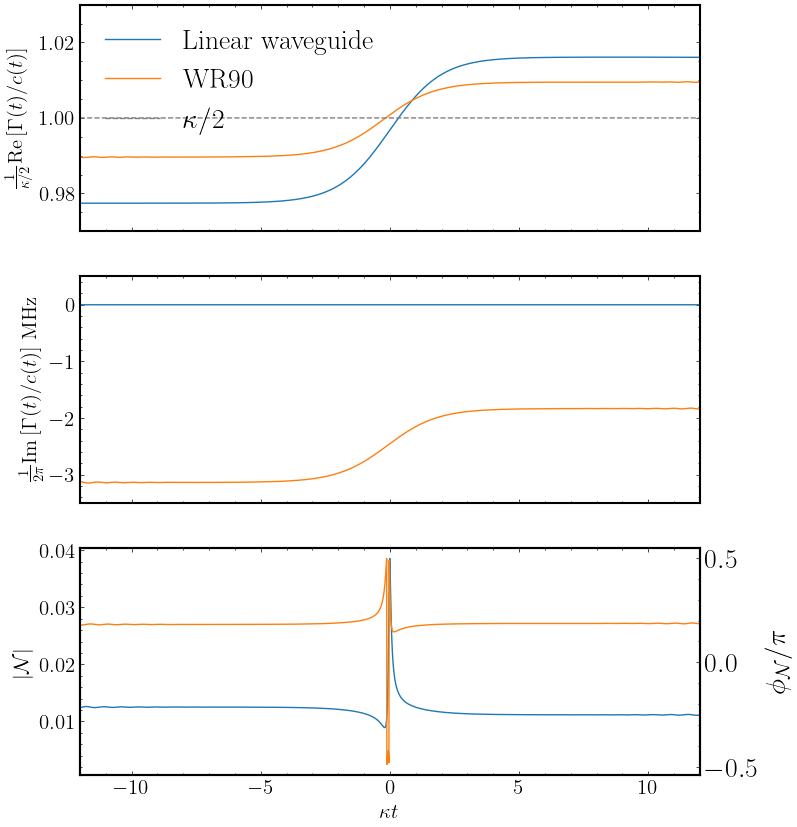

In [53]:
TT= 20
kappa = 2*π*200*1e-3
Nts = 5000

tt = np.linspace(-TT/kappa, TT/kappa, Nts)

fig, (ax1, ax2, ax) = plt.subplots(nrows=3, figsize = (8,10), sharex = True)

plt.rc('font', size=25)
plt.rcParams.update({'font.size': 20})


ax1.plot(tt*kappa, np.real(M2_linear_disp)/(kappa/2), label = 'Linear waveguide')
ax1.plot(tt*kappa, np.real(M2_real_disp)/(kappa/2), label = 'WR90')
ax1.plot(tt*kappa, np.ones(Nts), '--', label = '$\\kappa/2$', color = 'grey')

ax2.plot(tt*kappa, np.imag(M2_linear_disp)/2/π*1e3)
ax2.plot(tt*kappa, np.imag(M2_real_disp)/2/π*1e3)


ax1.set_ylabel('$\\frac{1}{\kappa/2}\\text{Re}\\left[ \Gamma(t) / c(t)   \\right]$')
ax2.set_ylabel('$\\frac{1}{2 \\pi}\\text{Im} \\left[ \Gamma(t) / c(t)  \\right]$ MHz')

ax1.set_ylim(0.97,1.03)
ax2.set_ylim(-3.5, 0.5)

ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)
ax1.legend()


ax.plot(tt*kappa, np.abs(a_factor_real_disp), label = ' a_factor realistic dispersion')

ax_aux = ax.twinx()

ax_aux.plot(tt*kappa, np.arctan(np.imag(a_factor_real_disp)/np.real(a_factor_real_disp))/π, label = '$\mathcal{N}$ ', color='tab:orange')


ax.set_xlabel('$\kappa t$')
ax.set_ylabel('$|\mathcal{N}|$')


ax_aux.set_xlabel('$\kappa t$')
ax_aux.set_ylabel('$\\phi_{\mathcal{N}} / \\pi$')


# ax.set_ylim(0.010,0.014)
# ax_aux.set_ylim(0.15, 0.22)

ax.set_xlim(-12,12)
ax_aux.set_xlim(-12,12)

# ax.legend()
# ax_aux.legend()

plt.show()



fig.savefig('fig2_ressub.svg')
fig.savefig('fig2_ressub.pdf')

## Figure 3

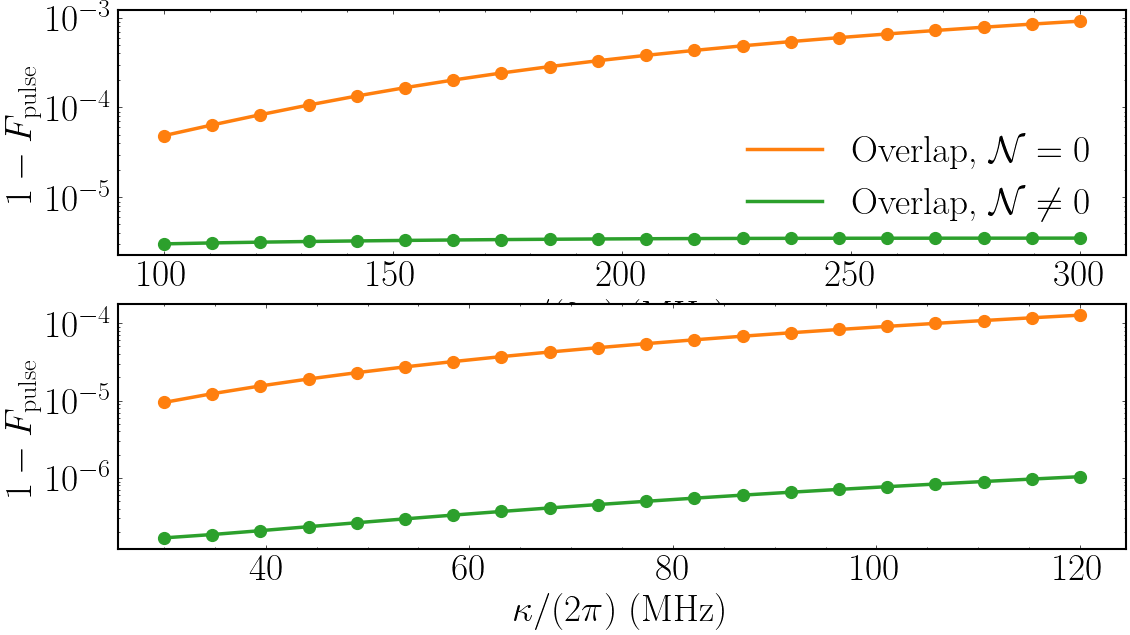

In [55]:
fig, (ax, ax2) = plt.subplots(nrows = 2, figsize = (13,7), sharex=False)

plt.rcParams.update({'font.size': 27})

kappalist = np.linspace(100, 300, 20)*2*π*1e-3

ax.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_5m_kappa_100_300_AZERO_middle.npy') , 'o', markersize = 8.5, color = 'tab:orange')
ax.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_5m_kappa_100_300_AZERO_middle.npy') , label = 'Overlap, $\mathcal{N} = 0$', linewidth = 2.5, color = 'tab:orange')

ax.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_5m_kappa_100_300_Aneq0_middle.npy'), 'o', markersize = 8.5, color = 'tab:green')
ax.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_5m_kappa_100_300_Aneq0_middle.npy'), label = 'Overlap, $\mathcal{N} \\neq 0 $', linewidth = 2.5, color = 'tab:green')

kappalist = np.linspace(30, 120, 20)*2*π*1e-3
ax2.set_xlabel('$\kappa/(2\pi)$ (MHz)')
ax.set_xlabel('$\kappa/(2\pi)$ (MHz)')

ax.set_ylabel('$1 - F_\\text{pulse} $')

ax2.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_60m_kappa_30_120_AZERO_middle.npy'), 'o',  markersize = 8.5, color = 'tab:orange')
ax2.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_60m_kappa_30_120_AZERO_middle.npy'), label = 'Overlap $\mathcal{N} = 0$', linewidth = 2.5, color = 'tab:orange')

ax2.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_60m_kappa_30_120_Aneq0_middle.npy'), 'o',  markersize = 8.5, color = 'tab:green')
ax2.semilogy(kappalist/2/π*1e3, np.load('Data/overlap_60m_kappa_30_120_Aneq0_middle.npy'), label = 'Overlap $\mathcal{N} \\neq 0$', linewidth = 2.5, color = 'tab:green')


ax2.set_ylabel('$1 - F_\\text{pulse} $')
ax.legend()

plt.show()

# fig.savefig('Overlap_and_ST_linear_Option3.svg')
# fig.savefig('Overlap_and_ST_linear_Option3.pdf')


## Figure 4

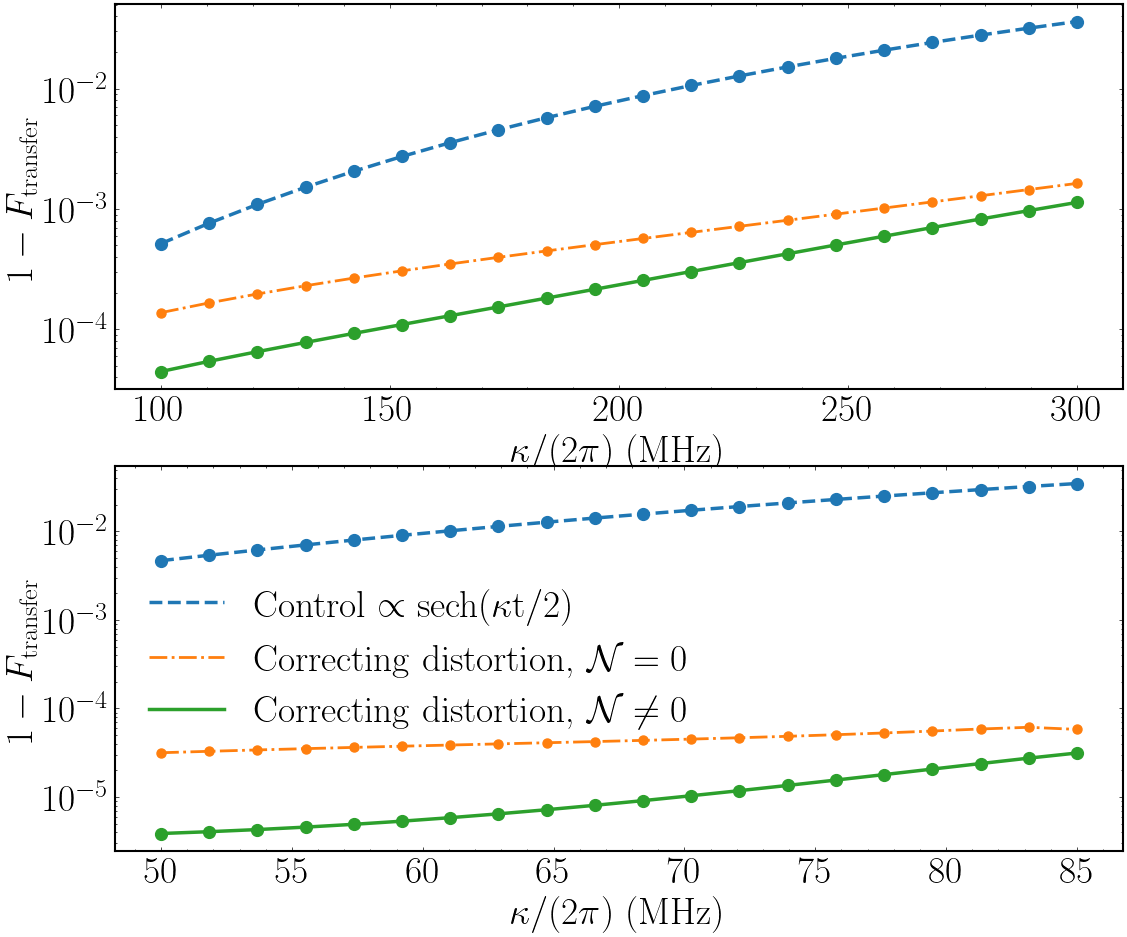

In [56]:
fig, (ax, ax2) = plt.subplots(nrows = 2, figsize = (13,11))

plt.rcParams.update({'font.size': 27})

kappalist = np.linspace(100,300,20)*2*π*1e-3

ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300_DZERO.npy'), 'o', markersize = 8.5, color='tab:blue')
ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300_DZERO.npy'), '--', linewidth = 2.5)

ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300_AZERO.npy'), 'o',   markersize = 6.5, color='tab:orange')
ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300_AZERO.npy'), '-.',  linewidth = 2)

ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300.npy'), 'o',  markersize = 8.5, color='tab:green')
ax.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_5m_kappa_100-300.npy'),  linewidth = 2.5)

kappalist = np.linspace(50,85,20)*2*π*1e-3

ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85_DZERO.npy'),'o',   markersize = 8.5, color='tab:blue')
ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85_DZERO.npy'),'--',  linewidth = 2.5,  label = 'Control $\\propto \\rm{sech}(\\kappa t/2)$')

ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85_AZERO.npy'), 'o',  markersize = 6.5, color='tab:orange' )
ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85_AZERO.npy'),'-.', linewidth = 2, label = 'Correcting distortion, $\mathcal{N} = 0$'  )

ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85.npy'), 'o', markersize = 8.5, color='tab:green')
ax2.semilogy(kappalist/(2*π*1e-3),1-np.load('Data/state_transfer_correcting_60m_kappa_50-85.npy'),  linewidth = 2.5,label = 'Correcting distortion, $\mathcal{N} \\neq 0$')

ax.set_ylabel('$1 - F_\\text{transfer} $')
ax.set_xlabel('$\kappa/(2\pi)$ (MHz)')
ax2.set_ylabel('$1 - F_\\text{transfer} $')
ax2.set_xlabel('$\kappa/(2\pi)$ (MHz)')


ax2.legend()

plt.show()


# fig.savefig('ST_correcting.svg')
# fig.savefig('ST_correcting.pdf')

## Figure 5

Text(0.5, 0, '$\\kappa/(2\\pi)$ (GHz)')

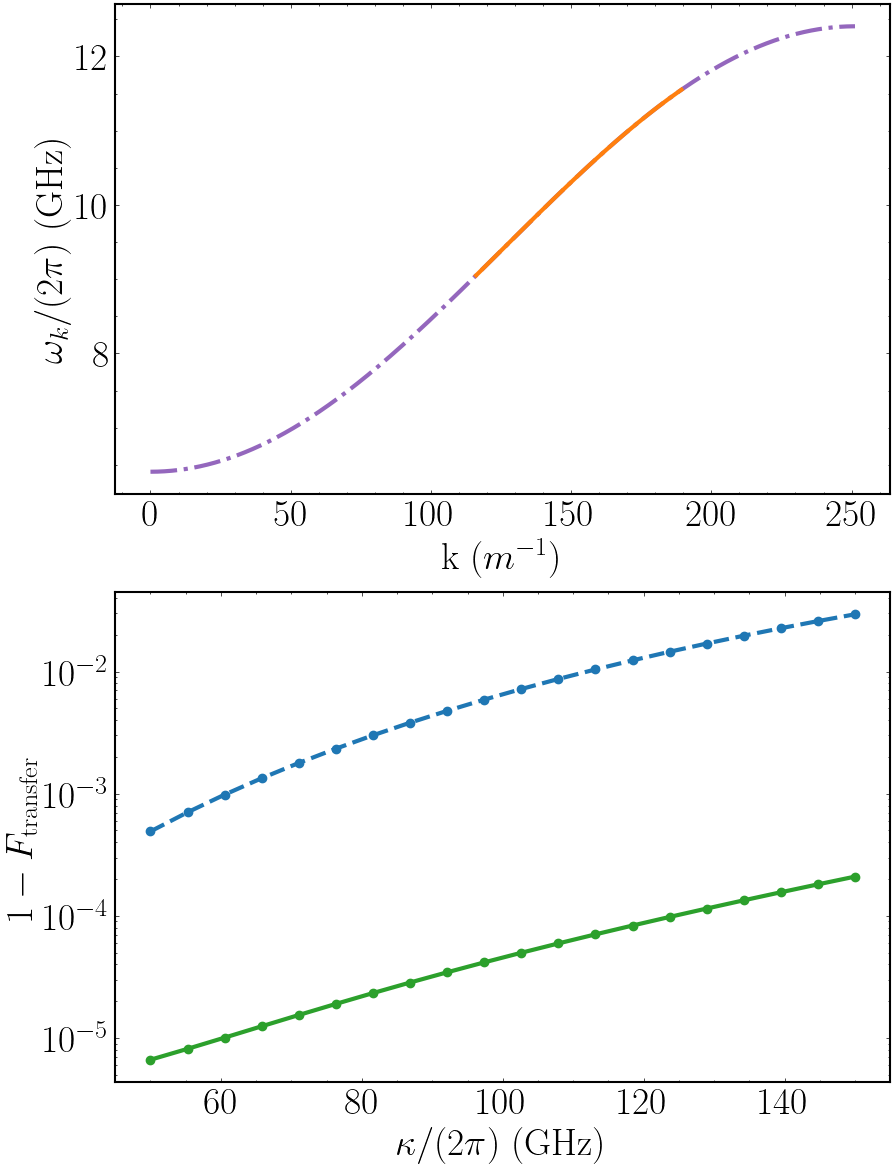

In [57]:
fig, (ax, ax2) = plt.subplots(nrows = 2, figsize = (10,14) )

kapalist = np.linspace(50,150, 20)
linewidth = 3 
ax.plot(np.load('Data/all_modes_WGcos_parameters_Fig5.npy'), np.load('Data/all_freqs_WGcos_parameters_Fig5.npy'), '-.',  color='tab:purple', linewidth = linewidth)
ax.plot(np.load('Data/operation_freqs_WGcos_parameters_Fig5.npy'), np.load('Data/operation_modes_WGcos_parameters_Fig5.npy'), color='tab:orange', linewidth = linewidth)

ax2.semilogy(kapalist, np.load('Data/infidelity_sech_50_150_MHz_30m_DRcos_700modes_Gcst.npy'), '--', color = 'tab:blue', linewidth = linewidth)
ax2.semilogy(kapalist, np.load('Data/infidelity_sech_50_150_MHz_30m_DRcos_700modes_Gcst.npy'),'o', color = 'tab:blue', linewidth = linewidth)

ax2.semilogy(kapalist, np.load('Data/infidelity_corrected_50_150_MHz_30m_DRcos_700modes_Gcst.npy'), '-', color='tab:green', linewidth = linewidth)
ax2.semilogy(kapalist, np.load('Data/infidelity_corrected_50_150_MHz_30m_DRcos_700modes_Gcst.npy'), 'o', color='tab:green', linewidth = linewidth)


ax.set_xlabel('k ($m^{-1}$)')
ax.set_ylabel('$\omega_k/(2\pi)$ (GHz)')


ax2.set_ylabel('$1-F_\\text{transfer}$')
ax2.set_xlabel('$\kappa/(2\pi)$ (GHz)')

## Figure 6

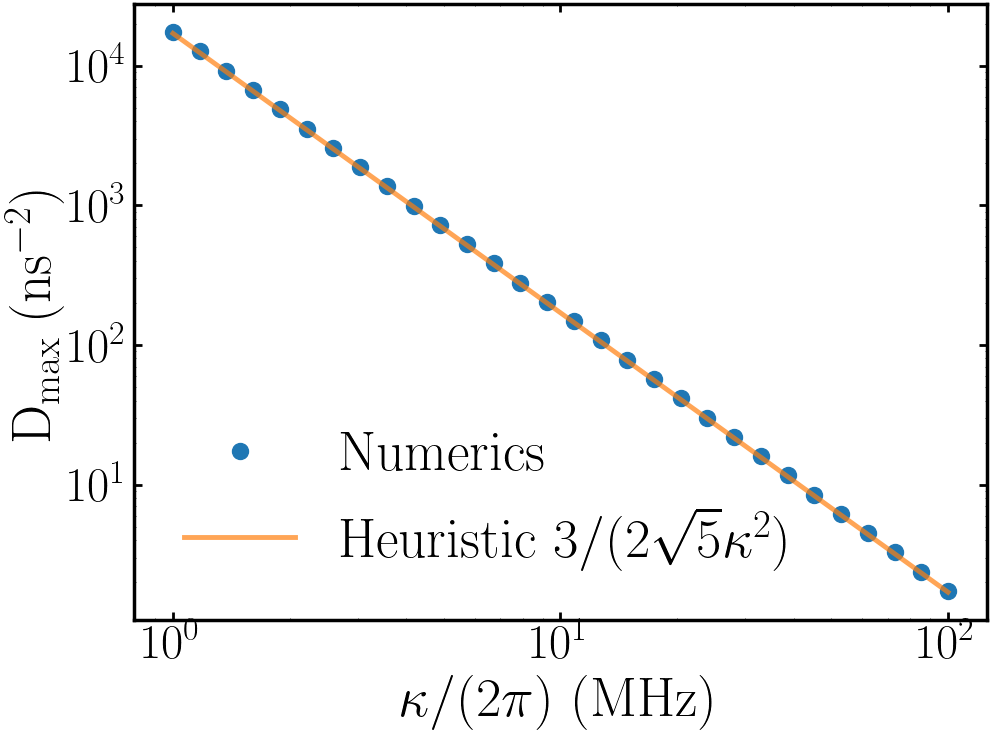

In [59]:
fig, ax = plt.subplots(figsize = (11,8) )

with open('Data/MaximumD_vs_kappa_3levels.txt', 'r') as f:
    lines = f.readlines()
    #lines[0] = 0
    x = [float(line.split()[0]) for line in lines[1:]]
    y = [float(line.split()[1]) for line in lines[1:]]

plt.rcParams.update({'font.size': 35})
plt.rcParams['axes.linewidth'] = 2.5 #set the value globally
ax.tick_params(length=6, width=2)

ax.loglog( (np.array(x)/2/π*1e3), y, 'o', markersize = 11.5, color = 'tab:blue', alpha=1, label = 'Numerics')

ax.loglog( (np.array(x)/2/π*1e3), 3/(2*np.sqrt(5)*(np.array(x))**2), linewidth = 3.5, alpha=0.7, color = 'tab:orange', label = 'Heuristic $3/(2 \sqrt{5} \kappa^2)$')




ax.set_ylabel('$\\text{D}_\\text{max} \; (\\text{ns}^{-2})$', fontsize = 40)
ax.set_xlabel('$\kappa/(2\pi)$ (MHz)', fontsize = 40)

ax.legend( fontsize = 40, loc = 'lower left')
plt.show()

# fig.savefig('Fig_5.svg')
# fig.savefig('Fig_5.pdf')
